# KNN (K Nearest Neighbor)

## Data preprocessing
1. Importing Libraries
2. Importing the Dataset
3. Encoding independent/dependent variables
4. Feature Scaling
5. Splitting the dataset into the Training set and Test set

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Importing the dataset
dataset = pd.read_csv("winenew.csv")
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [4]:
# locating dependent and independent variables
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1].values

In [5]:
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [6]:
# Encoding dependent variable
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 1])

In [7]:
# Data normalization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

In [8]:
X[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
print("X_tarin :",X_train.shape,"X_test :" ,X_test.shape)
print("y_train :",y_train.shape,"   y_test :" ,y_test.shape)

X_tarin : (1279, 11) X_test : (320, 11)
y_train : (1279,)    y_test : (320,)


## Training and Predicting

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
y_predict = knn_model.predict(X_test)

## Accuracy

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.71875

## Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_predict)
confusion_m

array([[ 92,  49],
       [ 41, 138]], dtype=int64)

## Handling Misclassified samples

In [18]:
misclassified_samples = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    misclassified_samples.append((y_test != pred_i).sum())

In [19]:
print(misclassified_samples)

[78, 97, 94, 94, 92, 96, 96, 93, 92, 87, 90, 90, 93, 88, 88, 87, 89, 90, 98]


In [20]:
confusion_m1 = pd.DataFrame(data=confusion_m,index=["good","bad"],columns=["good","bad"])
confusion_m1

,good,bad
good,92,49
bad,41,138


In [21]:
#Finding the values of k
ks =21
mean_acc = np.zeros((ks-1))

for n in range(1,ks):
    neighbors = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_hat = neighbors.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,y_hat)

In [22]:
mean_acc

array([0.75625 , 0.696875, 0.70625 , 0.70625 , 0.7125  , 0.7     ,
       0.7     , 0.709375, 0.7125  , 0.728125, 0.71875 , 0.71875 ,
       0.709375, 0.725   , 0.725   , 0.728125, 0.721875, 0.71875 ,
       0.69375 , 0.7     ])

In [23]:
print("The best accuracy : ",mean_acc.max(),"k=",mean_acc.argmax()+1)

The best accuracy :  0.75625 k= 1


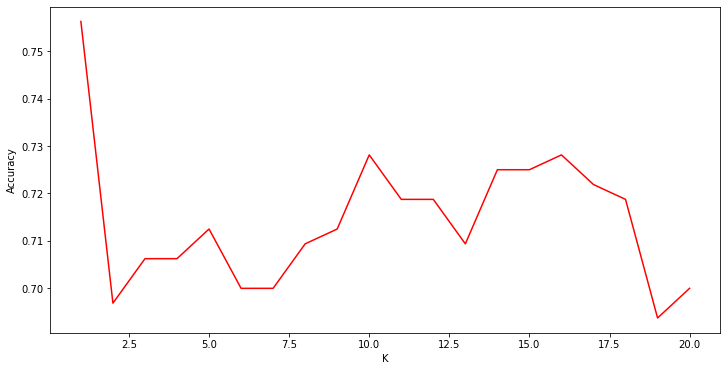

In [24]:
plt.figure(figsize=(12,6))
plt.plot(range(1,ks),mean_acc,'r')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.show()

## Classification report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       141
           1       0.74      0.77      0.75       179

    accuracy                           0.72       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.72      0.72      0.72       320

